In [1]:
import DEBRaVE as dbrv
import pytest
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_crossCorrelate():
    """
    Tests the crosscorrelate function 
    """
    
    flux1=np.random.rand(1,1000)
    flux2=np.random.rand(1,1000)
    wav=np.linspace(6000,6200,1000)
    template1=np.vstack((wav,flux1))
    template2=np.vstack((wav,flux2))

    val=dbrv.FStarSpectra.crossCorrelate(template1)

    return val



    



In [6]:
'''x1=np.random.rand(1000,1)
flux2=np.random.rand(1000,1)
wav=np.linspace(6000,6200,1000)
template1=np.vstack((wav,flux1))
template2=np.vstack((wav,flux2))

val=dbrv.FStarSpectra.crossCorrelate(template1,template2)
plt.plot(wav,flux1)
plt.plot(wav,flux2)
'''


'x1=np.random.rand(1000,1)\nflux2=np.random.rand(1000,1)\nwav=np.linspace(6000,6200,1000)\ntemplate1=np.vstack((wav,flux1))\ntemplate2=np.vstack((wav,flux2))\n\nval=dbrv.FStarSpectra.crossCorrelate(template1,template2)\nplt.plot(wav,flux1)\nplt.plot(wav,flux2)\n'

In [7]:
help(dbrv)

Help on module DEBRaVE:

NAME
    DEBRaVE

DESCRIPTION
    Filename:   DEBRaVE.py
    Author(s):  Peter Quigley, David Dougan, Ganesh Pawar
    Contact:    pquigley@uwo.ca
    Created:    2023-07-10
    Updated:    2023-07-10
        
    Usage: python DEBRaVE.py

CLASSES
    builtins.object
        Spectra
            FStarSpectra
    
    class FStarSpectra(Spectra)
     |  FStarSpectra(time, radec, wavelength, fluxes)
     |  
     |  This is the class for F-star spectra.
     |  
     |  Method resolution order:
     |      FStarSpectra
     |      Spectra
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  TODCOR(self, template1, template2, light_ratio=1)
     |      Performs the TODCOR algorithm on the spectra.
     |      
     |      Args:
     |          template1 (FStarSpectra): the primary template spectra.
     |          template2 (FStarSpectra): the secondary template spectra.
     |          light_ratio (float, optional): the ratio of the 

In [8]:
sp=dbrv.readSpectraFITS('./TestSpectra/ADP.2014-09-25T15_33_52.153.fits')
sp[0],sp[1],sp[2],sp[3]

('2011-09-09T08:06:33.362',
 (82.503136, -76.24845),
 array([3781.41, 3781.42, 3781.43, ..., 6912.74, 6912.75, 6912.76]),
 array([ 428.62878,  277.8849 ,  273.13376, ..., 9417.885  , 9302.555  ,
        9237.451  ], dtype=float32))

('2011-09-09T08:06:33.362',
 (82.503136, -76.24845),
 array([3781.41, 3781.42, 3781.43, ..., 6912.74, 6912.75, 6912.76]),
 array([ 428.62878,  277.8849 ,  273.13376, ..., 9417.885  , 9302.555  ,
        9237.451  ], dtype=float32))

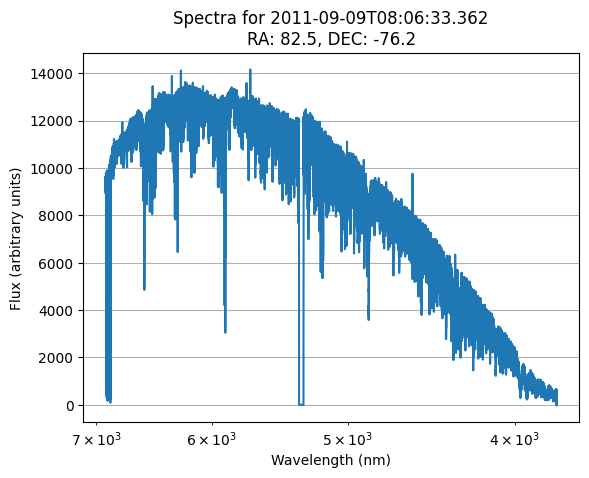

In [9]:
spct=dbrv.Spectra(sp[0],sp[1],sp[2],sp[3])
spct.plotSpectra()
spct.spectra_data
sp

In [98]:
temp1=dbrv.FStarSpectra(sp[0],sp[1],sp[2][20000:25000]*(1+0.008),sp[3][20000:25000])
temp2=dbrv.FStarSpectra(sp[0],sp[1],sp[2][20000:25000]*(1+0.01),sp[3][20000:25000])


In [90]:
temp3=dbrv.FStarSpectra(sp[0],sp[1],sp[2][20000:25000]*(1+0.008),sp[3][20000:25000])
#temp3.crossCorrelate(temp1)

In [91]:
fst=dbrv.FStarSpectra(sp[0],sp[1],sp[2][20000:25000],sp[3][20000:25000])

In [82]:
temp1=dbrv.FStarSpectra(sp[0],sp[1],sp[2]*(1+0.008),sp[3])
temp2=dbrv.FStarSpectra(sp[0],sp[1],sp[2]*(1+0.008),sp[3])
temp3=dbrv.FStarSpectra(sp[0],sp[1],sp[2]*(1+0.008),sp[3])
fst=dbrv.FStarSpectra(sp[0],sp[1],sp[2],sp[3])

In [83]:
fst.TODCOR(temp1,temp2)

Primary and secondary spectra have different wavelengths!
Primary and secondary spectra have different wavelengths!


IndexError: boolean index did not match indexed array along dimension 0; dimension is 313136 but corresponding boolean dimension is 1

In [92]:
class Spectra:
    """
    This is the superclass for all spectra objects.

    Attributes:
        time (str): the timestamp of the observation.
        radec (tuple): the RA and DEC of the observed object.
        spectra_data (numpy array): the wavelength and flux data of the spectra.
            2D array of shape (N,2).
        rms (float): the root mean square of the measured fluxes.
        errors (list): a list of error messages.

    """

    def __init__(self, time, radec, wavelength, fluxes):
        """
        Asigns the properties of the spectra

        Args:
            time (str): the timestamp of the observation.
            radec (tuple): the RA and DEC of the observed object.
            wavelength (numpy array): the wavelength data of the spectra.
                1D array of shape (N,1).
            fluxes (numpy array): the flux data of the spectra.
                1D array of shape (N,1).

        Returns:
            None
        
        """

        # Error collection
        self.errors = []

        # Parse init arguments
        self.time = time  # timestamp of the spectra as a string
        self.radec = radec  # this should be a tuple of (ra, dec)
        self.spectra_data = np.array([wavelength, fluxes]).transpose()
        self.rms = np.sqrt(np.mean(fluxes**2))  # root mean square of the fluxes


    def addError(self, error_msg):
        """
        Error handling function for spectra objects.

        Args:
            error_msg (str): the error message to be added to the error list.
        
        Returns:
            None

        """

        self.errors.append(error_msg)
        print(error_msg)


    def plotSpectra(self, redshift=None, savename=None):
        """
        Plots the spectra. Saves the plot if a savename is provided.
        Returns the matplotlib figure object.

        Args:
            savename (str, optional): the name of the file to save the plot to if provided.
                Defaults to None.
        
        Returns:
            matplotlib figure: the figure object of the plot.

        """

        # Plot the spectra
        plt.plot(self.spectra_data[:,0], self.spectra_data[:,1])
        plt.xscale('log')
        plt.gca().invert_xaxis()

        # Adjust the plot parameters
        plt.title(f"Spectra for {self.time}\nRA: {self.radec[0]:.1f}, DEC: {self.radec[1]:.1f}")
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Flux (arbitrary units)")
        plt.grid(True)

        # State the redshift if provided
        if (redshift is not None):
            plt.text(0.5, 0.9, f"z = {redshift:.4f}", transform=plt.gca().transAxes)

        # Save the plot if a savename is provided
        if (savename is not None):
            plt.savefig(savename)

        # Return the figure object
        return plt.gcf(), plt.gca()

In [106]:
class FStarSpectra(Spectra):
    """
    This is the class for F-star spectra.
    """

    # Define the wavelength range for F-star spectra cross-correlation
    min_wavelength = 6034.0  # Angstroms
    max_wavelength = 6666.0  # Angstroms

    def __init__(self, time, radec, wavelength, fluxes):
        """
        Asigns the properties of the F star spectra

        Args:
            time (str): the timestamp of the observation.
            radec (tuple): the RA and DEC of the observed object.
            wavelength (numpy array): the wavelength data of the spectra.
                1D array of shape (N,1).
            fluxes (numpy array): the flux data of the spectra.
                1D array of shape (N,1).

        Returns:
            None
        
        """

        super().__init__(time, radec, wavelength, fluxes)

    def crossCorrelate(self, template):
        """
        Cross-correlates the spectra with a template spectra.
        *Note: the wavelengths in the two spectra must be the same.


        Args:
            template (FStarSpectra): the template spectra to cross-correlate with.

        Returns:
            numpy array: the cross-correlation function.

        """

        # Input sanitization
        if len(self.spectra_data) != len(template.spectra_data):
            self.addError("Primary and secondary spectra are of different lengths!")
            return
        elif (self.spectra_data[:,0] != template.spectra_data[:,0]).all():
            self.addError("Primary and secondary spectra have different wavelengths!")
            return

        # Wavelength range check
        self_index_range = [(self.spectra_data[:,0] > FStarSpectra.min_wavelength) & (self.spectra_data[:,0] < FStarSpectra.max_wavelength)]
        template_index_range = [(template.spectra_data[:,0] > FStarSpectra.min_wavelength) & (template.spectra_data[:,0] < FStarSpectra.max_wavelength)]

        # Define cropped spectral data
        self_spectra_data = self.spectra_data
        template_spectra_data = template.spectra_data

        # Define the cross correlation variables
        N = len(self_spectra_data)
        sig_g = self.rms
        sig_t = template.rms

        # Calculate the cross correlation
        cross_corr = (N*sig_g*sig_t)**-1 * np.convolve(self_spectra_data[:,1], template_spectra_data[:,1])
        return cross_corr
    
    def mapTODCOR(self, template1, template2, light_ratio=1, savename=None, plot_block=True):
        """
        Make a heatmap of the TODCOR cross correlation function.

        Args:
            template1 (FStarSpectra): the primary template spectra.
            template2 (FStarSpectra): the secondary template spectra.
            light_ratio (float, optional): the ratio of the light from the primary to the secondary.
                Defaults to 1.
            savename (str): the filename for the heatmap if chosen to be saved.
                Defaults to not saving.
            plot_block (bool): choose whether the one heatmap is shown one at a time
                Defaults to True
        
        Returns:
            ind_arr (numpy array): the TODCOR index array.
                2D array of shape (M, N)

        """

        # Obtain TODCOR index array
        ind_arr = self.TODCOR(template1, template2, light_ratio)

        # Plot the heatmap
        plt.pcolormesh([template1.spectra_data[:,0], template2.spectra_data[:,0]], ind_arr, cmap='seismic')
        plt.colorbar()
        plt.title("TODCOR Cross-Correlation Function")
        plt.xlabel("Unshifted Wavelength (nm)")
        plt.ylabel("Shifted Wavelength (nm)")

        # Save the heatmap if a savename is provided
        if (savename is not None):
            plt.savefig(savename)

        plt.show(block=plot_block)
        return plt.gcf(), plt.gca(), ind_arr
    

    def TODCOR(self, template1, template2, light_ratio=1):
        """
        Performs the TODCOR algorithm on the spectra.
        
        Args:
            template1 (FStarSpectra): the primary template spectra.
            template2 (FStarSpectra): the secondary template spectra.
            light_ratio (float, optional): the ratio of the light from the primary to the secondary.
                Defaults to 1.
        
        Returns:
            cross_corr (numpy array): the TODCOR index array.
                2D array of shape (M, N)

        """

        # Obtain individual cross correlation functions
        cross_corr1 = self.crossCorrelate(template1)
        cross_corr2 = self.crossCorrelate(template2)
        cross_corr12 = template1.crossCorrelate(template2)

        # Calculate the TODCOR cross correlation function
        cross_corr = np.empty((len(template1.spectra_data),len(template2.spectra_data)))
        for i in range(len(template1.spectra_data)):
            for j in range(len(template2.spectra_data)):
                cross_corr[i,j] = (cross_corr1[i] + light_ratio*cross_corr2[j])/np.sqrt(1 + 2*light_ratio*cross_corr12[i,j] + light_ratio**2)


        return cross_corr



In [113]:
temp1=FStarSpectra(sp[0],sp[1],sp[2][20000:25000],sp[3][20000:25000])
temp2=FStarSpectra(sp[0],sp[1],sp[2][20000:25000],sp[3][20000:25000])
fst=FStarSpectra(sp[0],sp[1],sp[2][20000:25000],sp[3][20000:25000])

In [114]:
cross_corr1 = fst.crossCorrelate(temp1)
cross_corr2 = fst.crossCorrelate(temp2)
cross_corr12 = temp1.crossCorrelate(temp2)


In [123]:
#fst.TODCOR(temp1,temp2)
light_ratio=1
cross_corr = np.empty((len(temp1.spectra_data),len(temp2.spectra_data)))
for i in range(len(temp1.spectra_data)):
    for j in range(len(temp2.spectra_data)):
        cross_corr[i,j] = (cross_corr1[i] + light_ratio*cross_corr2[j])/np.sqrt(1 + 2*light_ratio*cross_corr12[i,j] + light_ratio**2)


 
# Calculate the TODCOR cross correlation function
        

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [124]:
cross_corr = np.empty((len(temp1.spectra_data), len(temp2.spectra_data)))
for i in range(len(temp1.spectra_data)):
    for j in range(len(temp2.spectra_data)):
        # Use 1-dimensional indexing for cross_corr1, cross_corr2, and cross_corr12
        cross_corr[i, j] = (cross_corr1[i] + light_ratio * cross_corr2[j]) / np.sqrt(1 + 2 * light_ratio * cross_corr12[i] + light_ratio**2)





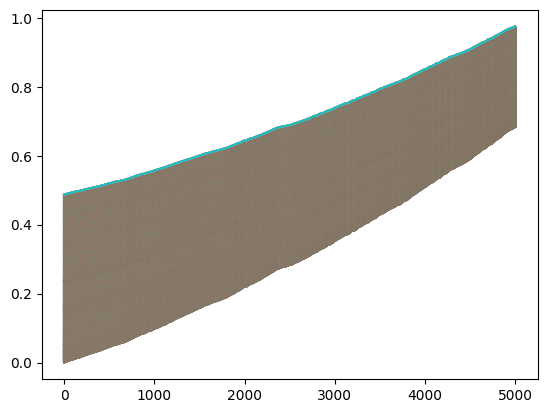

In [129]:
plt.plot(cross_corr.T)
plt.show()

In [136]:
import pandas as pd
temp3=FStarSpectra(sp[0],sp[1],sp[2]*(1+0.008),sp[3])

data=pd.DataFrame(temp3.spectra_data, dtype='float')
data[(data[0]>=min_wavelength) & (data[0]<=max_wavelength)]

,0,1
220471,6034.00896,12103.955078
220472,6034.01904,12034.001953
220473,6034.02912,11969.331055
220474,6034.03920,11924.988281
220475,6034.04928,11881.447266
...,...,...
283164,6665.95440,12109.268555
283165,6665.96448,12101.267578
283166,6665.97456,12185.613281
283167,6665.98464,12154.378906


In [134]:
min_wavelength = 6034.0  # Angstroms
max_wavelength = 6666.0  # Angstroms


# Wavelength range check
self_index_range = np.transpose([(temp1.spectra_data[:,0] > FStarSpectra.min_wavelength) & (temp1.spectra_data[:,0] < FStarSpectra.max_wavelength)])
template_index_range = [(temp2.spectra_data[:,0] > FStarSpectra.min_wavelength) & (temp2.spectra_data[:,0] < FStarSpectra.max_wavelength)]


In [100]:
temp1.spectra_data[:,0]
self_spectra_data = temp1.spectra_data[self_index_range]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1

In [88]:
temp1.spectra_data[new]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 313136 but corresponding boolean dimension is 5000

In [80]:
self_index_range.shape
new=np.hstack((self_index_range,self_index_range))
new.shape
print(new)

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


In [101]:
N = len(temp1.spectra_data)
sig_g = temp1.rms
sig_t = temp2.rms
cross_corr = (N*sig_g*sig_t)**-1 * np.convolve(temp1.spectra_data[:,1], temp2.spectra_data[:,1])
cross_corr

array([0.0001421 , 0.00029721, 0.00044201, ..., 0.00055805, 0.00037008,
       0.00019681])

In [102]:

    def crossCorrelate(self, template):
        """
        Cross-correlates the spectra with a template spectra.
        *Note: the wavelengths in the two spectra must be the same.


        Args:
            template (FStarSpectra): the template spectra to cross-correlate with.

        Returns:
            numpy array: the cross-correlation function.

        """

        # Input sanitization
        if len(self.spectra_data) != len(template.spectra_data):
            self.addError("Primary and secondary spectra are of different lengths!")
            return
        elif (self.spectra_data[:,0] != template.spectra_data[:,0]).all():
            self.addError("Primary and secondary spectra have different wavelengths!")
            return

        # Wavelength range check
        self_index_range = [(self.spectra_data[:,0] > FStarSpectra.min_wavelength) & (self.spectra_data[:,0] < FStarSpectra.max_wavelength)]
        template_index_range = [(template.spectra_data[:,0] > FStarSpectra.min_wavelength) & (template.spectra_data[:,0] < FStarSpectra.max_wavelength)]

        # Define cropped spectral data
        self_spectra_data = self.spectra_data
        template_spectra_data = template.spectra_data

        # Define the cross correlation variables
        N = len(self_spectra_data)
        sig_g = self.rms
        sig_t = template.rms

        # Calculate the cross correlation
        cross_corr = (N*sig_g*sig_t)**-1 * np.convolve(self_spectra_data[:,1], template_spectra_data[:,1])
        return cross_corr
